In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

In [20]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [21]:
len(x_test)

10000

In [22]:
len(x_train)

60000

In [23]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

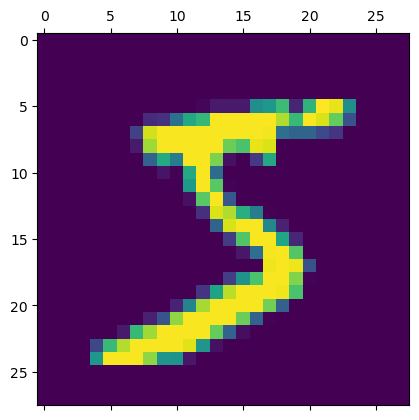

In [24]:
plt.matshow(x_train[0])

In [25]:
x_train[0].shape # convert it into a single 1D array

(28, 28)

In [26]:
x_train=x_train / 255
x_test = x_test / 255

In [31]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(-1, 28, 28)

In [43]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8723 - loss: 0.4596
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1298
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9740 - loss: 0.0862
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9808 - loss: 0.0635
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9861 - loss: 0.0471


In [32]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.0892


[0.07912862300872803, 0.9750000238418579]

In [33]:
y_pre=model.predict(x_test_flat)
y_pre[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step


array([2.3656292e-02, 6.2048592e-04, 7.2783285e-01, 9.7573525e-01,
       3.1761392e-05, 3.0740974e-02, 3.2505881e-07, 9.9999464e-01,
       1.9107328e-01, 4.2808715e-01], dtype=float32)

In [34]:
np.argmax(y_pre[3])

0

In [35]:
y_pred=[np.argmax(i) for i in y_pre]
y_pred[:5]

[7, 2, 1, 0, 4]

In [36]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [37]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    1,    1,    2,    1,    3,    0],
       [   0, 1125,    3,    0,    0,    0,    2,    0,    5,    0],
       [   7,    4, 1004,    2,    3,    0,    3,    3,    5,    1],
       [   0,    0,    4,  987,    0,    6,    0,    3,    3,    7],
       [   1,    0,    1,    0,  969,    0,    4,    3,    0,    4],
       [   3,    1,    0,    8,    2,  867,    5,    1,    4,    1],
       [   4,    3,    1,    1,    5,    2,  938,    0,    4,    0],
       [   1,    3,   12,    5,    3,    0,    0,  999,    1,    4],
       [   7,    0,    7,    6,   11,    5,    2,    3,  928,    5],
       [   3,    5,    0,    7,   19,    5,    0,    6,    2,  962]])>

Text(70.72222222222221, 0.5, 'truth')

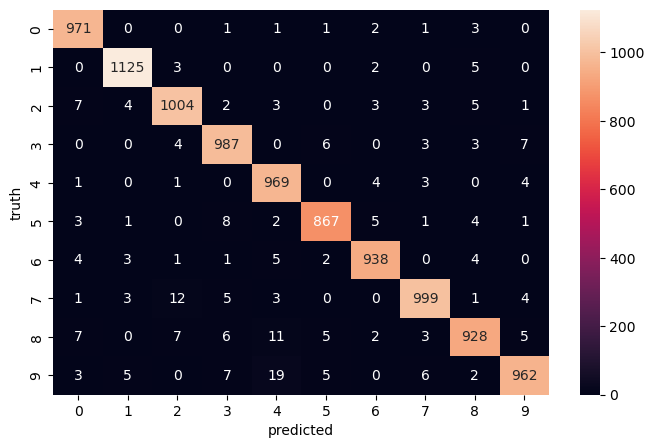

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("truth")

In [39]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation="sigmoid"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train_flat,y_train,epochs=5)

C:\Users\yadee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8222 - loss: 0.7115
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9389 - loss: 0.2137
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9550 - loss: 0.1562
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9663 - loss: 0.1167
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0987


In [44]:
model.evaluate(x_test_flat,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9739 - loss: 0.0854


[0.07496515661478043, 0.9769999980926514]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Text(70.72222222222221, 0.5, 'truth')

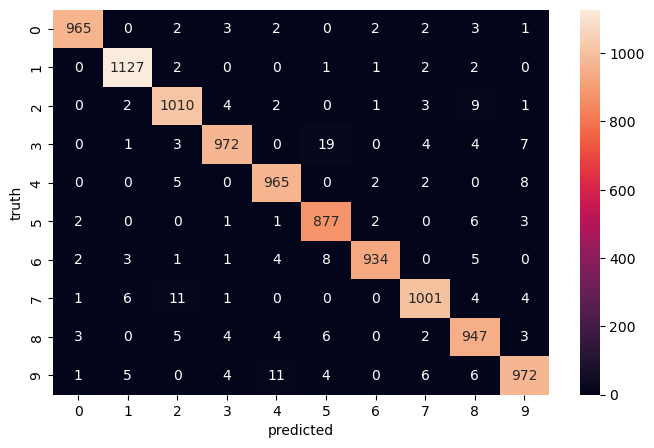

In [45]:
y_pre=model.predict(x_test_flat)
y_pred=[np.argmax(i) for i in y_pre]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel("truth")

In [46]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation="sigmoid"),
    keras.layers.Dense(10,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=5)

C:\Users\yadee\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\yadee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8292 - loss: 0.6960
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9372 - loss: 0.2209
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9565 - loss: 0.1531
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9667 - loss: 0.1197
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9726 - loss: 0.1016
